# Bloque 4 Cardiología: Práctica 3 - Machine Learning 

En esta práctica, exploraremos varios métodos fundamentales de aprendizaje supervisado que son esenciales para la clasificación de datos. Los conceptos que abordaremos incluyen:

1. **Regresión Lineal para Clasificación**: Aunque tradicionalmente utilizada para problemas de regresión, la regresión lineal puede adaptarse para tareas de clasificación. Veremos cómo se puede aplicar este método para predecir categorías discretas y discutiremos sus limitaciones y ventajas.

2. **Discriminante Lineal de Fisher**: Este método se centra en encontrar una combinación lineal de características que separa mejor dos o más clases de objetos o eventos. Aprenderemos cómo maximizar la separación entre clases y minimizar la varianza dentro de cada clase.

3. **Regresión Logística**: Una técnica poderosa para la clasificación binaria que modela la probabilidad de una clase en función de las características de entrada. Exploraremos su fundamento teórico y su aplicación práctica en problemas reales.

4. **Árboles de Decisión**: Un enfoque intuitivo y visual para la toma de decisiones basado en reglas derivadas de los datos. Analizaremos cómo construir y evaluar árboles de decisión, así como sus ventajas y desventajas en comparación con otros métodos.




## Regresión Lineal 

### Regresión

**Coeficientes ($\boldsymbol{\beta}$):**

   $$ \boldsymbol{\beta} = (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T \mathbf{y} $$

   Donde:
   - $ \boldsymbol{\beta} $ es el vector de coeficientes $(\beta_0, \beta_1, \ldots, \beta_n)$.
   - $ \mathbf{X} $ es la matriz de diseño que incluye una columna de unos para la intersección y las columnas de las variables independientes.
   - $ \mathbf{y} $ es el vector de la variable dependiente.
   - $ \mathbf{X}^T $ es la transpuesta de la matriz $\mathbf{X}$.
   - $ (\mathbf{X}^T \mathbf{X})^{-1} $ es la inversa de la matriz $\mathbf{X}^T \mathbf{X} $.

Coeficientes: 
 [152.91886183 938.23786125]
Error cuadrático medio: 2548.07
Coeficiente de determinación: 0.47


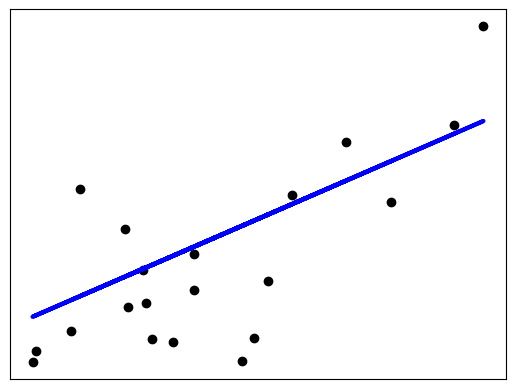

In [11]:
import matplotlib.pyplot as plt  # Importar la biblioteca matplotlib para crear gráficos
import numpy as np  # Importar la biblioteca numpy para manejo de arreglos y funciones matemáticas

from sklearn import datasets, linear_model  # Importar la biblioteca sklearn para modelos de aprendizaje automático
from sklearn.metrics import mean_squared_error, r2_score  # Importar funciones para evaluar el rendimiento del modelo

# Cargar el conjunto de datos de diabetes
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

# Usar solo una característica
diabetes_X = diabetes_X[:, np.newaxis, 2]  # Seleccionar solo la tercera característica

# Dividir los datos en conjuntos de entrenamiento/prueba
diabetes_X_train = diabetes_X[:-20]  # Usar todas las muestras excepto las últimas 20 para el entrenamiento
diabetes_X_test = diabetes_X[-20:] # Usar las últimas 20 muestras para la prueba

# Dividir los objetivos en conjuntos de entrenamiento/prueba
diabetes_y_train = diabetes_y[:-20] # Usar todos los objetivos excepto los últimos 20 para el entrenamiento
diabetes_y_test = diabetes_y[-20:] # Usar los últimos 20 objetivos para la prueba

X = np.hstack([np.ones(np.shape(diabetes_X_train)), diabetes_X_train])  # Añadir una columna de unos a los datos de entrenamiento

XXi = np.linalg.inv(X.T@X)  # Calcular la inversa de la matriz X transpuesta por X

beta = XXi@X.T@diabetes_y_train # Calcular los coeficientes beta usando la fórmula de regresión lineal

Xts = np.hstack([np.ones(np.shape(diabetes_X_test)), diabetes_X_test])  # Añadir una columna de unos a los datos de prueba

# Hacer predicciones usando el conjunto de prueba
diabetes_y_pred = Xts@beta # Calcular las predicciones multiplicando Xts por beta

# Los coeficientes
print("Coeficientes: \n", beta)  # Imprimir los coeficientes beta
# El error cuadrático medio
print(
    "Error cuadrático medio: %.2f"
    % mean_squared_error(diabetes_y_test, diabetes_y_pred)
)  # Calcular e imprimir el error cuadrático medio entre las predicciones y los valores reales
# El coeficiente de determinación: 1 es una predicción perfecta
print("Coeficiente de determinación: %.2f" % r2_score(diabetes_y_test, diabetes_y_pred))  # Calcular e imprimir el coeficiente de determinación (R^2)

# Graficar resultados
plt.scatter(diabetes_X_test, diabetes_y_test, color="black")  # Graficar los datos de prueba como puntos negros
plt.plot(diabetes_X_test, diabetes_y_pred, color="blue", linewidth=3)  # Graficar la línea de regresión en azul

plt.xticks(())  # Ocultar las marcas del eje x
plt.yticks(())  # Ocultar las marcas del eje y

plt.show()  # Mostrar el gráfico

### Ejemplo usando sklearn

Coeficientes: 
 (array([938.23786125]), 152.91886182616113)
Error cuadrático medio: 2548.07
Coeficiente de determinación: 0.47


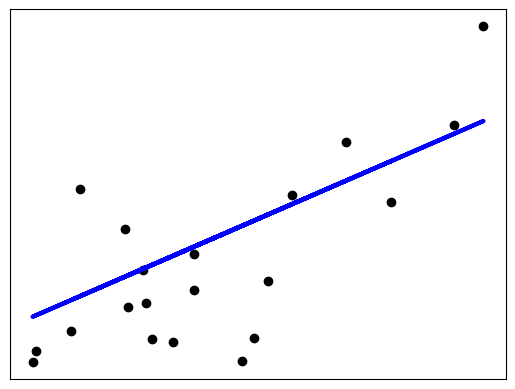

In [1]:
import matplotlib.pyplot as plt  # Importar la biblioteca matplotlib para crear gráficos
import numpy as np  # Importar la biblioteca numpy para manejo de arreglos y funciones matemáticas

from sklearn import datasets, linear_model  # Importar la biblioteca sklearn para modelos de aprendizaje automático
from sklearn.metrics import mean_squared_error, r2_score  # Importar funciones para evaluar el rendimiento del modelo

# Cargar el conjunto de datos de diabetes
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

# Usar solo una característica
diabetes_X = diabetes_X[:, np.newaxis, 2]  # Seleccionar solo la tercera característica

# Dividir los datos en conjuntos de entrenamiento/prueba
diabetes_X_train = diabetes_X[:-20]  # Usar todas las muestras excepto las últimas 20 para el entrenamiento
diabetes_X_test = diabetes_X[-20:] # Usar las últimas 20 muestras para la prueba

# Dividir los objetivos en conjuntos de entrenamiento/prueba
diabetes_y_train = diabetes_y[:-20] # Usar todos los objetivos excepto los últimos 20 para el entrenamiento
diabetes_y_test = diabetes_y[-20:] # Usar los últimos 20 objetivos para la prueba

# Crear objeto de regresión lineal
regr = linear_model.LinearRegression()  # Crear un objeto de regresión lineal

# Entrenar el modelo usando los conjuntos de entrenamiento
regr.fit(diabetes_X_train, diabetes_y_train)  # Ajustar el modelo a los datos de entrenamiento

# Hacer predicciones usando el conjunto de prueba
diabetes_y_pred = regr.predict(diabetes_X_test)  # Predecir los valores usando el modelo ajustado

# Los coeficientes
print("Coeficientes: \n", (regr.coef_, regr.intercept_))  # Imprimir los coeficientes y el intercepto del modelo
# El error cuadrático medio
print(
    "Error cuadrático medio: %.2f"
    % mean_squared_error(diabetes_y_test, diabetes_y_pred)
)  # Calcular e imprimir el error cuadrático medio entre las predicciones y los valores reales
# El coeficiente de determinación: 1 es una predicción perfecta
print("Coeficiente de determinación: %.2f" % r2_score(diabetes_y_test, diabetes_y_pred))  # Calcular e imprimir el coeficiente de determinación (R^2)

# Graficar resultados
plt.scatter(diabetes_X_test, diabetes_y_test, color="black")  # Graficar los datos de prueba como puntos negros
plt.plot(diabetes_X_test, diabetes_y_pred, color="blue", linewidth=3)  # Graficar la línea de regresión en azul

plt.xticks(())  # Ocultar las marcas del eje x
plt.yticks(())  # Ocultar las marcas del eje y

plt.show()  # Mostrar el gráfico

### Clasificación

Coeficientes: 
 [[-1.38777878e-17 -2.68882139e-17]
 [ 1.00000000e+00 -5.20417043e-18]
 [ 3.64291930e-17  1.00000000e+00]]


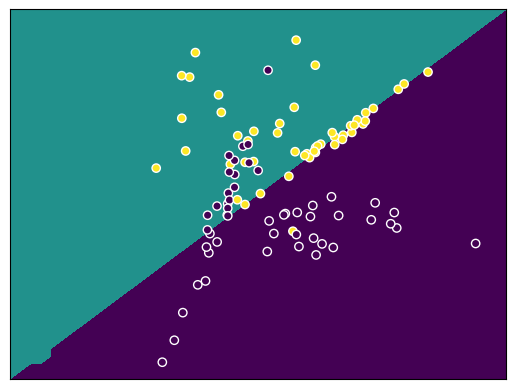

In [2]:
import matplotlib.pyplot as plt  # Importar la biblioteca matplotlib para crear gráficos
import numpy as np  # Importar la biblioteca numpy para manejo de arreglos y funciones matemáticas

from sklearn import datasets, linear_model  # Importar la biblioteca sklearn para modelos de aprendizaje automático
from sklearn.metrics import mean_squared_error, r2_score  # Importar funciones para evaluar el rendimiento del modelo

# Generar un conjunto de datos de clasificación
datos, etiquetas = datasets.make_classification(
    n_samples=1000, n_features=2, n_redundant=0, random_state=42
)

# Dividir los datos en conjuntos de entrenamiento/prueba
datos_train = datos[:-100,:] # Usar todas las muestras excepto las últimas 100 para el entrenamiento
datos_test = datos[-100:,:]  # Usar las últimas 100 muestras para la prueba

# Dividir los objetivos en conjuntos de entrenamiento/prueba
etiquetas_train = etiquetas[:-100] # Usar todos los objetivos excepto los últimos 100 para el entrenamiento
etiquetas_test = etiquetas[-100:]  # Usar los últimos 100 objetivos para la prueba

# Añadir una columna de unos a los datos de entrenamiento
X = np.hstack([np.ones((len(datos_train), 1)), datos_train])

# Crear una matriz de ceros para las etiquetas de entrenamiento
Y = np.zeros((len(etiquetas_train), 2))
Y[np.arange(len(etiquetas_train)), etiquetas_train] = 1  # Asignar 1 a la columna correspondiente a la etiqueta

# Calcular la inversa de la matriz X transpuesta por X
XXi = np.linalg.inv(X.T@X)

# Calcular los coeficientes beta usando la fórmula de regresión lineal
beta = XXi@X.T@datos_train

# Añadir una columna de unos a los datos de prueba
Xts = np.hstack([np.ones((len(datos_test), 1)), datos_test])

# Hacer predicciones usando el conjunto de prueba
etiquetas_pred = Xts @ beta  # Calcular las predicciones multiplicando Xts por beta
etiquetas_pred = np.argmax(etiquetas_pred, axis=1)  # Obtener la etiqueta con mayor probabilidad

# Crear una malla de puntos para graficar las regiones de decisión
(xx, yy) = np.meshgrid(
    np.linspace(np.min(datos), np.max(datos)), np.linspace(np.min(datos), np.max(datos))
)

h = np.zeros(np.shape(xx))  # Inicializar una matriz de ceros para las regiones de decisión

# Calcular las regiones de decisión para cada punto en la malla
for i in range(len(xx)):
    for j in range(len(yy)):
        h[i, j] = np.argmax(np.hstack([1, xx[i, j], yy[i, j]]) @ beta)

# Los coeficientes
print("Coeficientes: \n", beta)  # Imprimir los coeficientes beta

plt.figure()  # Crear una nueva figura
# Graficar resultados
cs = plt.contourf(xx, yy, h, levels=[0, 1], extend="both")  # Graficar las regiones de decisión
plt.scatter(datos_test[:, 0], datos_test[:, 1], c=etiquetas_test, edgecolors="white")  # Graficar los datos de prueba con sus etiquetas

plt.xticks(())  # Ocultar las marcas del eje x
plt.yticks(())  # Ocultar las marcas del eje y

plt.show()  # Mostrar el gráfico

## Análisis de Discriminante Lineal (LDA)
En la práctica, no conocemos los parámetros de las distribuciones gaussianas y necesitamos estimarlos usando nuestros datos de entrenamiento (para cada una de las clases):

- $\hat{\pi}_k = \frac{N_k}{N}$, donde $N_k$ es el número de observaciones de la clase $k$;
- $\hat{\mu}_k = \frac{1}{N_k} \sum_{g_i=k} \mathbf{x}_i$;
- $\hat{\Sigma} = \frac{1}{N - K} \sum_{k=1}^K \sum_{g_i=k} (\mathbf{x}_i - \hat{\mu}_k)(\mathbf{x}_i - \hat{\mu}_k)^T$.
- Calcular el resultado de las Funciones discriminantes lineales:
  $
  \delta_k(\mathbf{x}) = \mathbf{x}^T \Sigma^{-1} \mu_k - \frac{1}{2} \mu_k^T \Sigma^{-1} \mu_k + \log \pi_k
  $
- Asignar el dato a la clase cuya función de discriminante sea mayor.


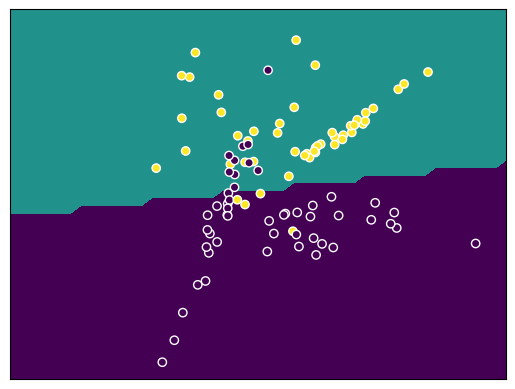

In [3]:
import matplotlib.pyplot as plt  # Importar la biblioteca matplotlib para crear gráficos
import numpy as np  # Importar la biblioteca numpy para manejo de arreglos y funciones matemáticas
from sklearn import datasets  # Importar la biblioteca sklearn para modelos de aprendizaje automático
from sklearn.metrics import mean_squared_error, r2_score  # Importar funciones para evaluar el rendimiento del modelo

def LDF(x, S, muk, pik):
    iS = np.linalg.inv(S) # Calcular la inversa de la matriz de covarianza
    delta = x.T@iS@muk - (1/2)*muk.T@iS@muk + (np.log(pik)) # Calcular la función discriminante lineal
    return delta

# Generar un conjunto de datos de clasificación
datos, etiquetas = datasets.make_classification(
    n_samples=1000, n_features=2, n_redundant=0, random_state=42
)

# Dividir los datos en conjuntos de entrenamiento/prueba
datos_train = datos[:-100,:] # Usar todas las muestras excepto las últimas 100 para el entrenamiento
datos_test = datos[-100:,:]  # Usar las últimas 100 muestras para la prueba

# Dividir los objetivos en conjuntos de entrenamiento/prueba
etiquetas_train = etiquetas[:-100] # Usar todos los objetivos excepto los últimos 100 para el entrenamiento
etiquetas_test = etiquetas[-100:]  # Usar los últimos 100 objetivos para la prueba

p = 2  # Número de dimensiones
pik = np.zeros((2, 1))  # Inicializar a ceros las probabilidades a priori
muk = np.zeros((2, p))  # Inicializar a ceros las medias
S = np.zeros((2, 2))  # Inicializar a cero la matriz de covarianza

N = len(etiquetas_train)  # Número de muestras de entrenamiento
K = 2  # Número de clases
for i in range(2):
    pik[i] = np.mean(etiquetas_train == i) # Calcular las probabilidades a priori
    muk[i, :] = np.mean(datos_train[etiquetas_train == i], axis= 0) # Calcular las medias de cada clase
    S += np.cov(datos_train[etiquetas_train == i], rowvar= False)  # Calcular la matriz de covarianza

S /= N - K  # Normalizar la matriz de covarianza

delta = np.zeros((len(etiquetas_test), 2))  # Inicializar la matriz delta
for i in range(2):
    for j in range(len(etiquetas_test)):
        delta[j, i] = LDF(datos_test[j, :], S, muk[i, :], pik[i, 0])  # Calcular la función discriminante lineal para cada muestra de prueba

etiquetas_pred = np.argmax(delta, axis=1)  # Obtener las etiquetas predichas

(xx, yy) = np.meshgrid(
    np.linspace(np.min(datos), np.max(datos)), np.linspace(np.min(datos), np.max(datos))
)  # Crear una malla de puntos para graficar las regiones de decisión

h = np.zeros(np.shape(xx))  # Inicializar una matriz de ceros para las regiones de decisión

delta = np.zeros((1, 2))  # Inicializar la matriz delta
for i in range(len(xx)):
    for j in range(len(yy)):
        for k in range(2):
            delta[0, k] = LDF(np.hstack([xx[i, j], yy[i, j]]), S, muk[k, :], pik[k, 0])  # Calcular la función discriminante lineal para cada punto en la malla
        h[i, j] = np.argmax(delta)  # Obtener la clase con mayor probabilidad

plt.figure()  # Crear una nueva figura
# Graficar resultados
cs = plt.contourf(xx, yy, h, levels=[0, 1], extend="both")  # Graficar las regiones de decisión
plt.scatter(datos_test[:, 0], datos_test[:, 1], c=etiquetas_test, edgecolors="white")  # Graficar los datos de prueba con sus etiquetas

plt.xticks(())  # Ocultar las marcas del eje x
plt.yticks(())  # Ocultar las marcas del eje y

plt.show()  # Mostrar el gráfico

### Ejemplo usando sklearn

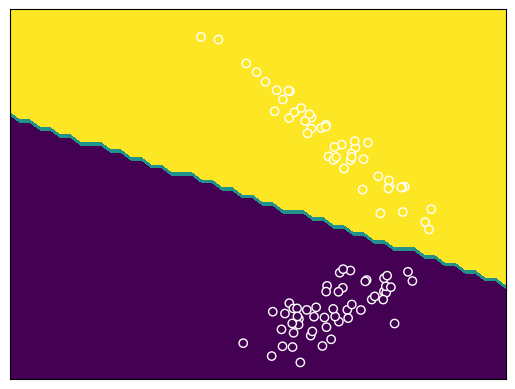

In [4]:
import matplotlib.pyplot as plt  # Importar la biblioteca matplotlib para crear gráficos
import numpy as np  # Importar la biblioteca numpy para manejo de arreglos y funciones matemáticas
from matplotlib import cm  # Importar la biblioteca cm de matplotlib para mapas de colores

from sklearn import datasets  # Importar la biblioteca sklearn para modelos de aprendizaje automático
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis  # Importar el modelo de Análisis Discriminante Lineal

# Generar un conjunto de datos de clasificación
datos, etiquetas = datasets.make_classification(
    n_samples=8000,  # Número de muestras
    n_features=2,  # Número de características
    n_classes=2,  # Número de clases
    n_clusters_per_class=1,  # Número de clusters por clase
    n_redundant=0,  # Número de características redundantes
    class_sep=2,  # Separación entre clases
    random_state=42,  # Semilla para la generación de datos aleatorios
)

# Dividir los datos en conjuntos de entrenamiento/prueba
datos_train = datos[:-100,:] # Usar todas las muestras excepto las últimas 100 para el entrenamiento
datos_test = datos[-100:,:]  # Usar las últimas 100 muestras para la prueba

# Dividir los objetivos en conjuntos de entrenamiento/prueba
etiquetas_train = etiquetas[:-100] # Usar todos los objetivos excepto los últimos 100 para el entrenamiento
etiquetas_test = etiquetas[-100:]  # Usar los últimos 100 objetivos para la prueba

# Crear el objeto de Análisis Discriminante Lineal (LDA)
lda = LinearDiscriminantAnalysis()
lda.fit(datos_train , etiquetas_train)  # Ajustar el modelo a los datos de entrenamiento

# Hacer predicciones usando el conjunto de prueba
etiquetas_pred = lda.predict(datos_test)  # Predecir las etiquetas usando el modelo ajustado

plt.figure()  # Crear una nueva figura
# Graficar resultados

(xx, yy) = np.meshgrid(
    np.linspace(np.min(datos), np.max(datos)), np.linspace(np.min(datos), np.max(datos))
)  # Crear una malla de puntos para graficar las regiones de decisión

Z = lda.predict(np.c_[xx.ravel(), yy.ravel()])  # Predecir las etiquetas para cada punto en la malla
Z = Z.reshape(xx.shape)  # Dar forma a las etiquetas predichas para que coincidan con la malla
cs = plt.contourf(xx, yy, Z, levels=[0, 0.5], extend="both")  # Graficar las regiones de decisión
plt.scatter(datos_test[:, 0], datos_test[:, 1], c=etiquetas_test, edgecolors="white")  # Graficar los datos de prueba con sus etiquetas

plt.xticks(())  # Ocultar las marcas del eje x
plt.yticks(())  # Ocultar las marcas del eje y

plt.show()  # Mostrar el gráfico

### Prueba con clasificación no-binaria

In [5]:
import matplotlib.pyplot as plt  # Importar la biblioteca matplotlib para crear gráficos
import numpy as np  # Importar la biblioteca numpy para manejo de arreglos y funciones matemáticas
from matplotlib import cm  # Importar la biblioteca cm de matplotlib para mapas de colores
import plotly.graph_objects as go  # Importar la biblioteca plotly para crear gráficos interactivos
import plotly.express as px  # Importar la biblioteca express de plotly para gráficos rápidos

from sklearn import datasets  # Importar la biblioteca sklearn para modelos de aprendizaje automático
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis  # Importar el modelo de Análisis Discriminante Lineal

# Generar un conjunto de datos de clasificación
datos, etiquetas = datasets.make_classification(
    n_samples=5000,  # Número de muestras
    n_features=3,  # Número de características
    n_classes=4,  # Número de clases
    n_informative=3,  # Número de características informativas
    n_redundant=0,  # Número de características redundantes
    random_state=42,  # Semilla para la generación de datos aleatorios
)

# Dividir los datos en conjuntos de entrenamiento/prueba
datos_train = datos[:-100,:] # Usar todas las muestras excepto las últimas 100 para el entrenamiento
datos_test = datos[-100:,:]  # Usar las últimas 100 muestras para la prueba

# Dividir los objetivos en conjuntos de entrenamiento/prueba
etiquetas_train = etiquetas[:-100] # Usar todos los objetivos excepto los últimos 100 para el entrenamiento
etiquetas_test = etiquetas[-100:]  # Usar los últimos 100 objetivos para la prueba

# Crear el objeto de Análisis Discriminante Lineal (LDA)
lda = LinearDiscriminantAnalysis()
lda.fit(datos_train , etiquetas_train)  # Ajustar el modelo a los datos de entrenamiento

# Hacer predicciones usando el conjunto de prueba
etiquetas_pred = lda.predict(datos_test)  # Predecir las etiquetas usando el modelo ajustado

fig = go.Figure()  # Crear una nueva figura

acierto = etiquetas_test == etiquetas_pred  # Comparar las etiquetas predichas con las etiquetas reales
colorList = px.colors.qualitative.G10  # Obtener una lista de colores cualitativos

myColors = [colorList[i] for i in etiquetas_test]  # Asignar colores a las etiquetas reales

fig.add_trace(
    go.Scatter3d(
        x=datos_test[:, 0],
        y=datos_test[:, 1],
        z=datos_test[:, 2],
        mode="markers",
        marker=dict(
            size=2,
            color=myColors,  # Asignar colores a los puntos según las etiquetas reales
            opacity=0.8,
        ),
    )
)
fig.show()  # Mostrar el gráfico

fig2 = go.Figure()  # Crear una nueva figura

acierto = etiquetas_test == etiquetas_pred  # Comparar las etiquetas predichas con las etiquetas reales

names = ["Fallo", "Acierto"]  # Nombres para los casos de fallo y acierto

for i in np.unique(acierto):
    idx = acierto == i  # Obtener los índices de los casos de fallo y acierto
    fig2.add_trace(
        go.Scatter3d(
            x=datos_test[idx, 0],
            y=datos_test[idx, 1],
            z=datos_test[idx, 2],
            mode="markers",
            name=names[i],  # Asignar nombres a los casos de fallo y acierto
            marker={"size": 2},
        )
    )
fig2.show()  # Mostrar el gráfico

/var/folders/60/c8jbwxws7bq2hyh3z5ngwpxm0000gn/T/ipykernel_42126/659692330.py:71: DeprecationWarning:

In future, it will be an error for 'np.bool_' scalars to be interpreted as an index



### Regresión Logística

1. **Log-verosimilitud**:
  $
   l(\bm\beta) = \sum_i^N\log p_{g_i}(x_i;\bm\beta)
 $

2. **Gradiente de la Log-verosimilitud**:
  $
    \dot l(\bm\beta) =  -\sum_i^Nx_i(y_i)-p(x_i;\bm\beta))
   $


3. **Hessiano de la Log-verosimilitud**:
  $
   \ddot l(\bm\beta) = -\sum_i^Nx_ix_i^Tp(x_i;\bm\beta)(1-p(x_i;\bm\beta))
   $

4. **Actualización de los Coeficientes**:
  $
   \bm\beta^n = (X^T\bm WX)^{-1}X^T\bm W \bm z ;  \bm z  = X\bm\beta^o + \bm W^{-1}(y-\bm p)
   $
   
   donde $\bm p$ es el vector de probabilidades del elemento $i$-ésimo $p(x_i;\bm\beta^o)$ y $\bm W$ es una matriz $N\times N$ cuya diagonal vale $p(x_i;\bm\beta^o)(1-p(x_i;\bm\beta^o))$

5. **Convergencia**:
   Repetir el paso 5 hasta que los cambios en \( \bm{\beta} \) sean menores que un umbral predefinido o hasta alcanzar un número máximo de iteraciones.

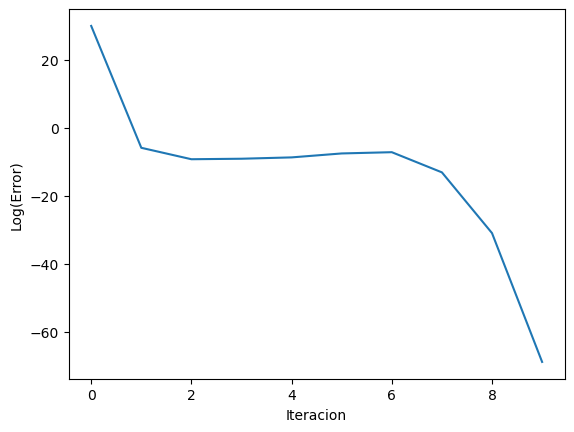

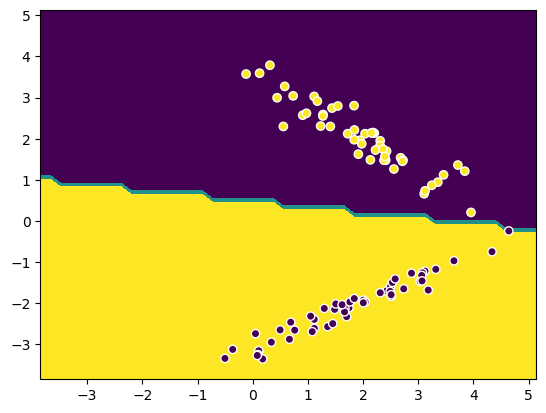

In [6]:
import matplotlib.pyplot as plt  # Importar la biblioteca matplotlib para crear gráficos
import numpy as np  # Importar la biblioteca numpy para manejo de arreglos y funciones matemáticas
from sklearn import datasets  # Importar la biblioteca sklearn para modelos de aprendizaje automático

def getMyProb(X, beta):
    p1 = 1 / (1 + np.exp(-np.sum(beta.T * X, axis = 1)))  # Calcular la probabilidad de la clase 1
    p0 = (1 - p1)  # Calcular la probabilidad de la clase 0
    W = np.diag(p1 * p0) # Calcular la matriz diagonal W
    return (p0.reshape(-1, 1), p1.reshape(-1, 1), W)  # Devolver las probabilidades y la matriz W

# Generar un conjunto de datos de clasificación
datos, etiquetas = datasets.make_classification(
    n_samples=1000,  # Número de muestras
    n_features=2,  # Número de características
    n_classes=2,  # Número de clases
    n_clusters_per_class=1,  # Número de clusters por clase
    n_redundant=0,  # Número de características redundantes
    class_sep=2,  # Separación entre clases
    random_state=42,  # Semilla para la generación de datos aleatorios
)

# Dividir los datos en conjuntos de entrenamiento/prueba
datos_train = datos[:-100,:] # Usar todas las muestras excepto las últimas 100 para el entrenamiento
datos_test = datos[-100:,:]  # Usar las últimas 100 muestras para la prueba

# Dividir los objetivos en conjuntos de entrenamiento/prueba
etiquetas_train = etiquetas[:-100] # Usar todos los objetivos excepto los últimos 100 para el entrenamiento
etiquetas_test = etiquetas[-100:]  # Usar los últimos 100 objetivos para la prueba

# Entrenamiento
x = np.hstack([np.ones((len(datos_train), 1)), datos_train])  # Añadir una columna de unos a los datos de entrenamiento
y = etiquetas_train
y = y.reshape(-1, 1)  # Redimensionar y a una columna
th = 1e-6  # Umbral para el error
error = np.array([1e3])  # Inicializar el error con un valor grande
beta = np.zeros((3, 1))  # Inicializar los coeficientes beta a ceros (b10 b11 b12)
k = 0  # Inicializar el contador de iteraciones
while error[-1] > th:  # Mientras el error sea mayor que el umbral
    oldBeta = beta  # Guardar los coeficientes beta anteriores
    p0, p1, W = getMyProb(x , beta)  # Calcular las probabilidades y la matriz W
    z = x @ beta + np.linalg.inv(W) @ (y - p1) # Calcular el vector z
    beta = np.linalg.inv(x.T @ W @ x) @ x.T @ W @ z # Actualizar los coeficientes beta usando el método iterativo IRLS
    errorN = np.mean((beta - oldBeta) ** 2) # Calcular el error cuadrático medio entre los coeficientes anteriores y los nuevos
    error = np.hstack([error, errorN])  # Añadir el error a la lista de errores

plt.figure()  # Crear una nueva figura
plt.plot(10 * np.log10(error))  # Graficar el logaritmo del error en dB
plt.xlabel("Iteracion")  # Etiqueta del eje x
plt.ylabel("Log(Error)")  # Etiqueta del eje y

# Clasificamos con las probabilidades
plt.figure()  # Crear una nueva figura
(xx, yy) = np.meshgrid(
    np.linspace(np.min(datos), np.max(datos)), np.linspace(np.min(datos), np.max(datos))
)  # Crear una malla de puntos para graficar las regiones de decisión

data = np.c_[xx.ravel(), yy.ravel()]  # Aplanar la malla y combinar las coordenadas x e y

data = np.hstack([np.ones((len(data), 1)), data])  # Añadir una columna de unos a los datos

(p0ts, p1ts, W) = getMyProb(data, beta)  # Calcular las probabilidades y la matriz W para los datos

Z = p0ts > 0.5  # Clasificar los puntos según la probabilidad de la clase 0

cs = plt.contourf(xx, yy, Z.reshape(xx.shape), levels=[0, 0.5], extend="both")  # Graficar las regiones de decisión
plt.scatter(datos_test[:, 0], datos_test[:, 1], c=etiquetas_test, edgecolors="white")  # Graficar los datos de prueba con sus etiquetas

plt.show()  # Mostrar el gráfico

### Versión Sklearn

In [7]:
import matplotlib.pyplot as plt  # Importar la biblioteca matplotlib para crear gráficos
import numpy as np  # Importar la biblioteca numpy para manejo de arreglos y funciones matemáticas
from matplotlib import (
    cm,
)  # Importar la biblioteca cm de matplotlib para mapas de colores

from sklearn import (
    datasets,
)  # Importar la biblioteca sklearn para modelos de aprendizaje automático
from sklearn.linear_model import (
    LogisticRegression,
)  # Importar el modelo de Regresión Logística
import plotly.graph_objects as go  # Importar la biblioteca plotly para crear gráficos interactivos

# Generar un conjunto de datos de clasificación
datos, etiquetas = datasets.make_classification(
    n_samples=5000,  # Número de muestras
    n_features=2,  # Número de características
    n_classes=4,  # Número de clases
    n_clusters_per_class=1,  # Número de clusters por clase
    n_redundant=0,  # Número de características redundantes
    class_sep=2,  # Separación entre clases
    random_state=42,  # Semilla para la generación de datos aleatorios
)

# Dividir los datos en conjuntos de entrenamiento/prueba
datos_train = datos[
    :-500
]  # Usar todas las muestras excepto las últimas 500 para el entrenamiento
datos_test = datos[-500:]  # Usar las últimas 500 muestras para la prueba

# Dividir los objetivos en conjuntos de entrenamiento/prueba
etiquetas_train = etiquetas[
    :-500
]  # Usar todos los objetivos excepto los últimos 500 para el entrenamiento
etiquetas_test = etiquetas[-500:]  # Usar los últimos 500 objetivos para la prueba

# Crear el objeto de Regresión Logística (LR)
LR = LogisticRegression(penalty=None)
LR.fit(
    X=datos_train, y=etiquetas_train
)  # Ajustar el modelo a los datos de entrenamiento

# Clasificamos con las probabilidades
plt.figure()  # Crear una nueva figura
(xx, yy) = np.meshgrid(
    np.linspace(np.min(datos), np.max(datos)), np.linspace(np.min(datos), np.max(datos))
)  # Crear una malla de puntos para graficar las regiones de decisión

data = np.c_[
    xx.ravel(), yy.ravel()
]  # Aplanar la malla y combinar las coordenadas x e y

Z = LR.predict(data)  # Predecir las etiquetas usando el modelo ajustado

fig = go.Figure()  # Crear una nueva figura

fig.add_trace(
    go.Contour(
        x=np.unique(xx),
        y=np.unique(yy),
        z=Z.reshape(xx.shape),
        colorscale="Turbo",
        showscale=False,
        contours=dict(
            start=0,
            end=3,
            size=1,
        ),
        opacity=0.2,
    )
)  # Añadir el contorno de las regiones de decisión al gráfico

fig.add_trace(
    go.Scatter(
        x=datos_test[:, 0],
        y=datos_test[:, 1],
        marker=dict(
            size=5,
            color=etiquetas_test,  # Asignar colores a los puntos según las etiquetas reales
            colorscale="Turbo",  # Usar una escala de colores predefinida
            cmin=0,
            cmax=3,
            showscale=True,
        ),
        mode="markers",
    )
)  # Añadir los puntos del conjunto de prueba al gráfico

fig.update_coloraxes()  # Actualizar los ejes de color
fig.show()  # Mostrar el gráfico

<Figure size 640x480 with 0 Axes>

### Árboles de Decisión


In [8]:
import numpy as np  # Importar la biblioteca numpy para manejo de arreglos y funciones matemáticas
from myDT import *  # Importar todas las funciones y clases del módulo myDT
from sklearn import (
    datasets,
)  # Importar la biblioteca sklearn para modelos de aprendizaje automático
import plotly.graph_objects as go  # Importar la biblioteca plotly para crear gráficos interactivos

# Generar un conjunto de datos de clasificación
datos, etiquetas = datasets.make_classification(
    n_samples=1000,  # Número de muestras
    n_features=2,  # Número de características
    n_classes=2,  # Número de clases
    n_clusters_per_class=1,  # Número de clusters por clase
    n_redundant=0,  # Número de características redundantes
    class_sep=0.5,  # Separación entre clases
    random_state=42,  # Semilla para la generación de datos aleatorios
)

# Dividir los datos en conjuntos de entrenamiento/prueba
datos_train = datos[
    :-100
]  # Usar todas las muestras excepto las últimas 100 para el entrenamiento
datos_test = datos[-100:]  # Usar las últimas 100 muestras para la prueba

# Dividir los objetivos en conjuntos de entrenamiento/prueba
etiquetas_train = etiquetas[
    :-100
]  # Usar todos los objetivos excepto los últimos 100 para el entrenamiento
etiquetas_test = etiquetas[-100:]  # Usar los últimos 100 objetivos para la prueba

# Combinar los datos y las etiquetas en un solo arreglo para el entrenamiento y la prueba
trainData = np.hstack((datos_train, etiquetas_train.reshape([len(datos_train), 1])))
testData = np.hstack((datos_test, etiquetas_test.reshape([len(datos_test), 1])))

# Entrenar el árbol de decisión y hacer predicciones en los datos de prueba
(pred, tree) = decision_tree(trainData, testData, max_depth=2, min_size=1)

# Crear una malla de puntos para graficar las regiones de decisión
(xx, yy) = np.meshgrid(
    np.linspace(np.min(datos), np.max(datos)), np.linspace(np.min(datos), np.max(datos))
)

data = np.c_[
    xx.ravel(), yy.ravel()
]  # Aplanar la malla y combinar las coordenadas x e y

# Hacer predicciones para cada punto en la malla utilizando el árbol de decisión entrenado
predictions = []
for row in data:
    prediction = predict(tree, row)
    predictions.append(prediction)
Z = np.array(predictions).reshape(
    np.shape(xx)
)  # Dar forma a las predicciones para que coincidan con la malla

fig = go.Figure()  # Crear una nueva figura

fig.add_trace(
    go.Contour(
        x=np.unique(xx),
        y=np.unique(yy),
        z=Z.reshape(xx.shape),
        colorscale=[
            [0.0, "rgb(31, 119, 180)"],
            [0.1, "rgb(255, 127, 14)"],
            [0.2, "rgb(44, 160, 44)"],
            [0.3, "rgb(214, 39, 40)"],
            [0.4, "rgb(148, 103, 189)"],
            [0.5, "rgb(140, 86, 75)"],
            [0.6, "rgb(227, 119, 194)"],
            [0.7, "rgb(127, 127, 127)"],
            [0.8, "rgb(188, 189, 34)"],
            [0.9, "rgb(23, 190, 207)"],
            [1.0, "rgb(31, 119, 180)"],
        ],
        showscale=False,
        contours=dict(
            start=0,
            end=3,
            size=1,
        ),
        opacity=0.2,
    )
)  # Añadir el contorno de las regiones de decisión al gráfico

fig.add_trace(
    go.Scatter(
        x=datos_test[:, 0],
        y=datos_test[:, 1],
        marker=dict(
            size=5,
            color=etiquetas_test,  # Asignar colores a los puntos según las etiquetas reales
            colorscale=[
                [0.0, "rgb(31, 119, 180)"],
                [0.1, "rgb(255, 127, 14)"],
                [0.2, "rgb(44, 160, 44)"],
                [0.3, "rgb(214, 39, 40)"],
                [0.4, "rgb(148, 103, 189)"],
                [0.5, "rgb(140, 86, 75)"],
                [0.6, "rgb(227, 119, 194)"],
                [0.7, "rgb(127, 127, 127)"],
                [0.8, "rgb(188, 189, 34)"],
                [0.9, "rgb(23, 190, 207)"],
                [1.0, "rgb(31, 119, 180)"],
            ],
            cmin=0,
            cmax=3,
            showscale=True,
        ),
        mode="markers",
    )
)  # Añadir los puntos del conjunto de prueba al gráfico

fig.update_coloraxes()  # Actualizar los ejes de color
fig.show()  # Mostrar el gráfico

### Poda (versión Sklearn)

El número de nodos en el último árbol es: 1 con ccp_alpha: 0.12059659754955197


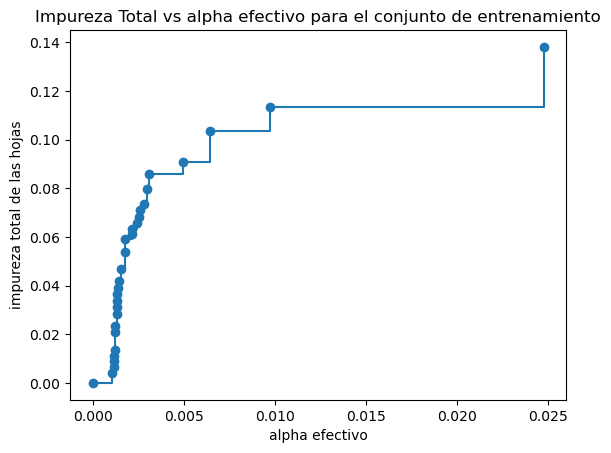

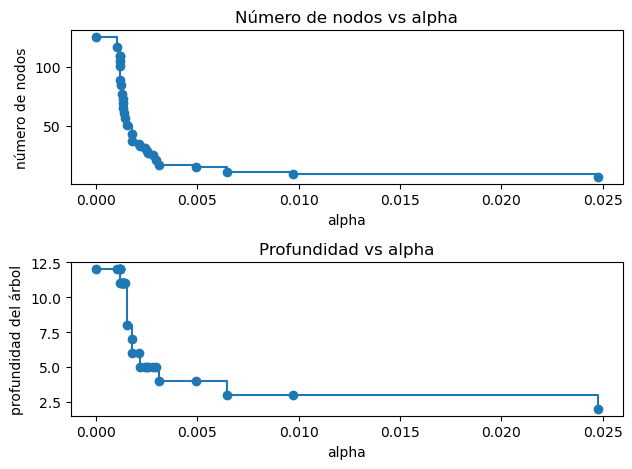

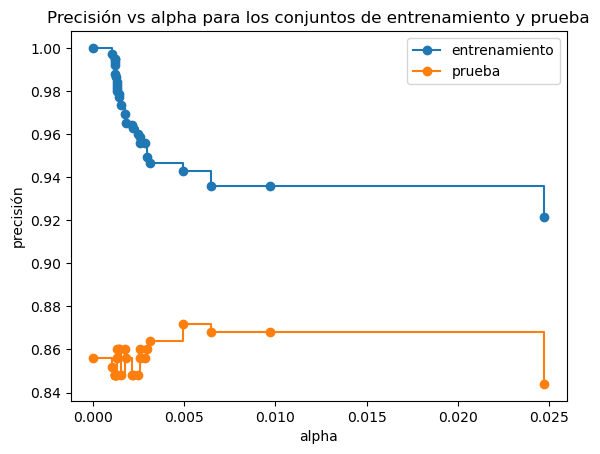

[Text(0.5416666666666666, 0.9, 'x[1] <= 0.005\ngini = 0.5\nsamples = 750\nvalue = [371, 379]'),
 Text(0.3333333333333333, 0.7, 'x[0] <= 0.635\ngini = 0.452\nsamples = 379\nvalue = [248, 131]'),
 Text(0.4375, 0.8, 'True  '),
 Text(0.16666666666666666, 0.5, 'x[1] <= -0.138\ngini = 0.111\nsamples = 237\nvalue = [223, 14]'),
 Text(0.08333333333333333, 0.3, 'gini = 0.062\nsamples = 220\nvalue = [213.0, 7.0]'),
 Text(0.25, 0.3, 'x[0] <= 0.494\ngini = 0.484\nsamples = 17\nvalue = [10, 7]'),
 Text(0.16666666666666666, 0.1, 'gini = 0.346\nsamples = 9\nvalue = [2, 7]'),
 Text(0.3333333333333333, 0.1, 'gini = 0.0\nsamples = 8\nvalue = [8, 0]'),
 Text(0.5, 0.5, 'x[1] <= -0.131\ngini = 0.29\nsamples = 142\nvalue = [25, 117]'),
 Text(0.4166666666666667, 0.3, 'gini = 0.099\nsamples = 115\nvalue = [6, 109]'),
 Text(0.5833333333333334, 0.3, 'gini = 0.417\nsamples = 27\nvalue = [19, 8]'),
 Text(0.75, 0.7, 'x[0] <= 0.7\ngini = 0.443\nsamples = 371\nvalue = [123, 248]'),
 Text(0.6458333333333333, 0.8, '  

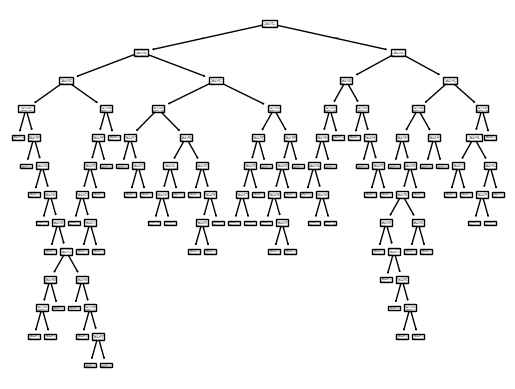

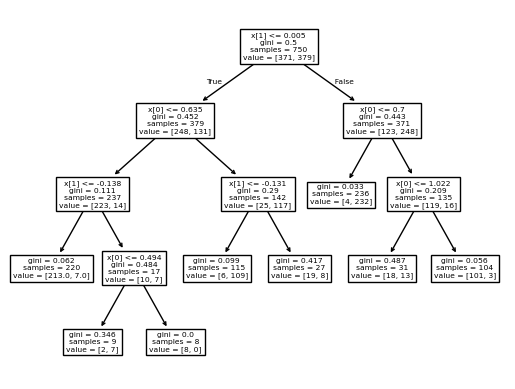

In [9]:
import numpy as np  # Importa la biblioteca numpy para trabajar con matrices y operaciones numéricas
from myDT import *  # Importa todo desde el módulo myDT (asegúrate de tener este módulo disponible)
from sklearn import (
    datasets,
)  # Importa el módulo datasets de scikit-learn para generar conjuntos de datos
import matplotlib.pyplot as plt  # Importa matplotlib para crear gráficos
from sklearn.model_selection import (
    train_test_split,
)  # Importa la función para dividir los datos en entrenamiento y prueba
from sklearn.tree import (
    DecisionTreeClassifier,
)  # Importa el clasificador de árbol de decisión
from sklearn import (
    tree,
)  # Importa el módulo tree de scikit-learn para trabajar con árboles de decisión

# Genera un conjunto de datos de clasificación con 1000 muestras, 2 características, y 2 clases
X, y = datasets.make_classification(
    n_samples=1000,
    n_features=2,
    n_classes=2,
    n_clusters_per_class=1,
    n_redundant=0,
    class_sep=0.3,
    random_state=42,
)

# Divide los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Crea un clasificador de árbol de decisión
clf = DecisionTreeClassifier(random_state=0)
# Calcula la ruta de poda de complejidad de costo
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

# Grafica la impureza total vs alpha efectivo para el conjunto de entrenamiento
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("alpha efectivo")
ax.set_ylabel("impureza total de las hojas")
ax.set_title("Impureza Total vs alpha efectivo para el conjunto de entrenamiento")

# Entrena múltiples clasificadores con diferentes valores de alpha de poda
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "El número de nodos en el último árbol es: {} con ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

# Excluye el último clasificador y alpha de poda para análisis adicional
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

# Grafica el número de nodos y la profundidad del árbol vs alpha
node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("número de nodos")
ax[0].set_title("Número de nodos vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("profundidad del árbol")
ax[1].set_title("Profundidad vs alpha")
fig.tight_layout()

# Calcula y grafica la precisión del conjunto de entrenamiento y prueba vs alpha
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("precisión")
ax.set_title("Precisión vs alpha para los conjuntos de entrenamiento y prueba")
ax.plot(
    ccp_alphas, train_scores, marker="o", label="entrenamiento", drawstyle="steps-post"
)
ax.plot(ccp_alphas, test_scores, marker="o", label="prueba", drawstyle="steps-post")
ax.legend()
plt.show()

fig, ax = plt.subplots()
tree.plot_tree(clfs[0], ax=ax)
fig, ax = plt.subplots()
idx = np.argmax(test_scores)
tree.plot_tree(clfs[idx], ax=ax)

## Bagging, Random Forest y Boosting (parcial sklearn)

In [10]:
import numpy as np  # Importa la biblioteca numpy para trabajar con matrices y operaciones numéricas
from myDT import *  # Importa todo desde el módulo myDT (asegúrate de tener este módulo disponible)
from sklearn import datasets  # Importa el módulo datasets de scikit-learn para generar conjuntos de datos
import matplotlib.pyplot as plt  # Importa matplotlib para crear gráficos
from sklearn.model_selection import train_test_split  # Importa la función para dividir los datos en entrenamiento y prueba
from sklearn.tree import DecisionTreeClassifier  # Importa el clasificador de árbol de decisión
from sklearn import tree  # Importa el módulo tree de scikit-learn para trabajar con árboles de decisión
import plotly.graph_objects as go  # Importa la biblioteca plotly para crear gráficos interactivos
from scipy import stats  # Importa la biblioteca scipy para funciones estadísticas

def BaggedPred(baggedClf, Xtest):
    pred = np.zeros((np.size(Xtest, 0), len(baggedClf)))  # Inicializa una matriz de ceros para las predicciones
    for i in range(len(baggedClf)):  # Itera sobre cada clasificador en el conjunto de clasificadores
        pred[:, i] = baggedClf[i].predict(Xtest) # Realiza predicciones usando el clasificador actual
    mode = stats.mode(pred, axis=1, keepdims=True) # Calcula la moda (valor más frecuente) a lo largo del eje 1 (filas)
    pred = mode[0]  # Obtiene las predicciones finales basadas en la moda
    return pred  # Devuelve las predicciones finales

# Genera un conjunto de datos de clasificación con 1000 muestras, 2 características, y 4 clases
X, y = datasets.make_classification(
    n_samples=1000,
    n_features=2,
    n_classes=4,
    n_clusters_per_class=1,
    n_redundant=0,
    class_sep=0.8,
    random_state=42,
)

# Divide los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

## BAGGING
# Crea un clasificador de árbol de decisión
clf = DecisionTreeClassifier(random_state=0)

B = 100  # Número de clasificadores en el conjunto (bagging)
baggedClf = []  # Lista para almacenar los clasificadores entrenados
np.random.seed = 42  # Fija la semilla aleatoria para reproducibilidad
for b in range(B):  # Itera sobre el número de clasificadores en el conjunto
    idxBs = np.random.choice(len(X_train), size= len(X_train), replace=True) # Genera índices aleatorios con reemplazo para crear un subconjunto de datos de bootstrap
    newX = X_train[idxBs] # Selecciona las muestras correspondientes a los índices generados
    newY = y_train[idxBs] # Selecciona las etiquetas correspondientes a los índices generados
    baggedClf.append(clf.fit(newX, newY))  # Entrena el clasificador con el subconjunto de datos y lo añade a la lista

(xx, yy) = np.meshgrid(
    np.linspace(np.min(X), np.max(X)), np.linspace(np.min(X), np.max(X))
)  # Crea una malla de puntos para graficar las regiones de decisión

data = np.c_[xx.ravel(), yy.ravel()]  # Aplanar la malla y combinar las coordenadas x e y

predictions = BaggedPred(baggedClf, data)  # Realiza predicciones usando el conjunto de clasificadores (bagging)

Z = np.array(predictions).reshape(np.shape(xx))  # Da forma a las predicciones para que coincidan con la malla

fig = go.Figure()  # Crea una nueva figura

fig.add_trace(
    go.Contour(
        x=np.unique(xx),
        y=np.unique(yy),
        z=Z.reshape(xx.shape),
        colorscale=[
            [0.0, "rgb(31, 119, 180)"],
            [0.1, "rgb(255, 127, 14)"],
            [0.2, "rgb(44, 160, 44)"],
            [0.3, "rgb(214, 39, 40)"],
            [0.4, "rgb(148, 103, 189)"],
            [0.5, "rgb(140, 86, 75)"],
            [0.6, "rgb(227, 119, 194)"],
            [0.7, "rgb(127, 127, 127)"],
            [0.8, "rgb(188, 189, 34)"],
            [0.9, "rgb(23, 190, 207)"],
            [1.0, "rgb(31, 119, 180)"],
        ],
        showscale=False,
        contours=dict(
            start=0,
            end=3,
            size=1,
        ),
        opacity=0.2,
    )
)  # Añade el contorno de las regiones de decisión al gráfico

fig.add_trace(
    go.Scatter(
        x=X_test[:, 0],
        y=X_test[:, 1],
        marker=dict(
            size=5,
            color=y_test,  # Asignar colores a los puntos según las etiquetas reales
            colorscale=[
                [0.0, "rgb(31, 119, 180)"],
                [0.1, "rgb(255, 127, 14)"],
                [0.2, "rgb(44, 160, 44)"],
                [0.3, "rgb(214, 39, 40)"],
                [0.4, "rgb(148, 103, 189)"],
                [0.5, "rgb(140, 86, 75)"],
                [0.6, "rgb(227, 119, 194)"],
                [0.7, "rgb(127, 127, 127)"],
                [0.8, "rgb(188, 189, 34)"],
                [0.9, "rgb(23, 190, 207)"],
                [1.0, "rgb(31, 119, 180)"],
            ],
            cmin=0,
            cmax=4,
            showscale=True,
        ),
        mode="markers",
    )
)  # Añade los puntos del conjunto de prueba al gráfico

fig.update_layout(title=dict(text="Bagging"))  # Actualiza el título del gráfico
fig.show()  # Muestra el gráfico

## Como hacerlo en python puro
# from sklearn.ensemble import BaggingClassifier

# decision_tree = DecisionTreeClassifier(random_state=100)

# bagging_skl = BaggingClassifier(base_estimator=decision_tree,
#                                n_estimators=500,
#                                max_features=1.0,
#                                bootstrap=True,
#                                random_state=100,
#                                n_jobs=-1)
# bagging_skl.fit(X_arr,y_arr)
# bagging_skl_pred = bagging_skl.predict(X_test_arr)

## Random Forest
clf = DecisionTreeClassifier(
    max_features="sqrt", random_state=100
)  # Para Random Forest, solo se puede usar DecisionTreeClassifier y max_features='sqrt'

B = 100  # Número de clasificadores en el conjunto (Random Forest)
RFClf = []  # Lista para almacenar los clasificadores entrenados
np.random.seed = 42  # Fija la semilla aleatoria para reproducibilidad
for b in range(B):  # Itera sobre el número de clasificadores en el conjunto
    idxBs = np.random.choice(len(X_train), size= len(X_train), replace=True) # Genera índices aleatorios con reemplazo para crear un subconjunto de datos de bootstrap
    newX = X_train[idxBs] # Selecciona las muestras correspondientes a los índices generados
    newY = y_train[idxBs] # Selecciona las etiquetas correspondientes a los índices generados
    RFClf.append(clf.fit(newX, newY))  # Entrena el clasificador con el subconjunto de datos y lo añade a la lista

(xx, yy) = np.meshgrid(
    np.linspace(np.min(X), np.max(X)), np.linspace(np.min(X), np.max(X))
)  # Crea una malla de puntos para graficar las regiones de decisión

data = np.c_[xx.ravel(), yy.ravel()]  # Aplanar la malla y combinar las coordenadas x e y

predictions = BaggedPred(RFClf, data)  # Realiza predicciones usando el conjunto de clasificadores (Random Forest)

Z = np.array(predictions.astype(int)).reshape(np.shape(xx))  # Da forma a las predicciones para que coincidan con la malla

fig = go.Figure()  # Crea una nueva figura
fig.add_trace(  # Añade una nueva traza (trace) al objeto fig
    go.Contour(  # Crea un gráfico de contorno
        x=np.unique(xx),  # Define los valores únicos del eje x
        y=np.unique(yy),  # Define los valores únicos del eje y
        z=Z.reshape(xx.shape),  # Define los valores de z, reorganizados para coincidir con la forma de xx
        colorscale=[  # Define la escala de colores para el gráfico de contorno
            [0.0, "rgb(31, 119, 180)"],
            [0.1, "rgb(255, 127, 14)"],
            [0.2, "rgb(44, 160, 44)"],
            [0.3, "rgb(214, 39, 40)"],
            [0.4, "rgb(148, 103, 189)"],
            [0.5, "rgb(140, 86, 75)"],
            [0.6, "rgb(227, 119, 194)"],
            [0.7, "rgb(127, 127, 127)"],
            [0.8, "rgb(188, 189, 34)"],
            [0.9, "rgb(23, 190, 207)"],
            [1.0, "rgb(31, 119, 180)"],
        ],
        showscale=False,  # Indica que no se debe mostrar la escala de colores
        contours=dict(  # Define las propiedades de los contornos
            start=0,  # Define el valor inicial del contorno
            end=3,  # Define el valor final del contorno
            size=1,  # Define el tamaño de los contornos
        ),
        opacity=0.2,  # Define la opacidad del gráfico de contorno
    )
)

fig.add_trace(  # Añade una nueva traza (trace) al objeto fig
    go.Scatter(  # Crea un gráfico de dispersión
        x=X_test[:, 0],  # Define los valores del eje x a partir de la primera columna de X_test
        y=X_test[:, 1],  # Define los valores del eje y a partir de la segunda columna de X_test
        marker=dict(  # Define las propiedades de los marcadores
            size=5,  # Define el tamaño de los marcadores
            color=y_test,  # Define los colores de los marcadores basados en y_test
            colorscale=[  # Define la escala de colores para los marcadores
                [0.0, "rgb(31, 119, 180)"],
                [0.1, "rgb(255, 127, 14)"],
                [0.2, "rgb(44, 160, 44)"],
                [0.3, "rgb(214, 39, 40)"],
                [0.4, "rgb(148, 103, 189)"],
                [0.5, "rgb(140, 86, 75)"],
                [0.6, "rgb(227, 119, 194)"],
                [0.7, "rgb(127, 127, 127)"],
                [0.8, "rgb(188, 189, 34)"],
                [0.9, "rgb(23, 190, 207)"],
                [1.0, "rgb(31, 119, 180)"],
            ],
            cmin=0,  # Define el valor mínimo para la escala de colores
            cmax=4,  # Define el valor máximo para la escala de colores
            showscale=True,  # Indica que se debe mostrar la escala de colores
        ),
        mode="markers",  # Define el modo del gráfico como marcadores
    )
)

fig.update_layout(title=dict(text="Random Forest"))  # Actualiza el diseño del gráfico y define el título
fig.show()  # Muestra el gráfico

# Sklear puro
# from sklearn.ensemble import RandomForestClassifier

# rf_skl = RandomForestClassifier(n_estimators=500,
#                                 max_features='sqrt',
#                                 bootstrap=True,
#                                 random_state=100,
#                                 n_jobs=-1)
# rf_skl.fit(X_arr,y_arr)
# rf_skl_pred = rf_skl.predict(X_test_arr)

# Boosting (Sklearn)

from sklearn.ensemble import GradientBoostingClassifier  # Importa el clasificador de Gradient Boosting de sklearn

skl_gbm = GradientBoostingClassifier(  # Crea una instancia del clasificador con los parámetros especificados
    random_state=100,  # Fija la semilla para la reproducibilidad
    n_estimators=1001,  # Define el número de árboles en el bosque
    criterion="squared_error",  # Define el criterio para medir la calidad de una división
    max_depth=2,  # Define la profundidad máxima de los árboles
    min_samples_split=5,  # Define el número mínimo de muestras requeridas para dividir un nodo
    min_samples_leaf=5,  # Define el número mínimo de muestras que debe tener un nodo hoja
    max_features=3,  # Define el número máximo de características a considerar para encontrar la mejor división
)

skl_gbm.fit(X_train, y_train)  # Entrena el modelo con los datos de entrenamiento X_train y y_train

Z = np.array(skl_gbm.predict(data).astype(int)).reshape(np.shape(xx))  # Predice las etiquetas para los datos y las reorganiza para que coincidan con la forma de xx

fig = go.Figure()  # Crea una nueva figura

fig.add_trace(  # Añade una nueva traza (trace) al objeto fig
    go.Contour(  # Crea un gráfico de contorno
        x=np.unique(xx),  # Define los valores únicos del eje x
        y=np.unique(yy),  # Define los valores únicos del eje y
        z=Z.reshape(xx.shape),  # Define los valores de z, reorganizados para coincidir con la forma de xx
        colorscale=[  # Define la escala de colores para el gráfico de contorno
            [0.0, "rgb(31, 119, 180)"],
            [0.1, "rgb(255, 127, 14)"],
            [0.2, "rgb(44, 160, 44)"],
            [0.3, "rgb(214, 39, 40)"],
            [0.4, "rgb(148, 103, 189)"],
            [0.5, "rgb(140, 86, 75)"],
            [0.6, "rgb(227, 119, 194)"],
            [0.7, "rgb(127, 127, 127)"],
            [0.8, "rgb(188, 189, 34)"],
            [0.9, "rgb(23, 190, 207)"],
            [1.0, "rgb(31, 119, 180)"],
        ],
        showscale=False,  # Indica que no se debe mostrar la escala de colores
        contours=dict(  # Define las propiedades de los contornos
            start=0,  # Define el valor inicial del contorno
            end=3,  # Define el valor final del contorno
            size=1,  # Define el tamaño de los contornos
        ),
        opacity=0.2,  # Define la opacidad del gráfico de contorno
    )
)


fig.add_trace(
    go.Scatter(
        x=X_test[:, 0],
        y=X_test[:, 1],
        marker=dict(
            size=5,
            color=y_test,  # set color equal to a variable
            colorscale=[
                [0.0, "rgb(31, 119, 180)"],
                [0.1, "rgb(255, 127, 14)"],
                [0.2, "rgb(44, 160, 44)"],
                [0.3, "rgb(214, 39, 40)"],
                [0.4, "rgb(148, 103, 189)"],
                [0.5, "rgb(140, 86, 75)"],
                [0.6, "rgb(227, 119, 194)"],
                [0.7, "rgb(127, 127, 127)"],
                [0.8, "rgb(188, 189, 34)"],
                [0.9, "rgb(23, 190, 207)"],
                [1.0, "rgb(31, 119, 180)"],
            ],
            cmin=0,
            cmax=4,
            showscale=True,
        ),
        mode="markers",
    )
)

fig.update_layout(title=dict(text="Boosting"))
fig.show()